In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from Logistic_Regression_Regularization import *
import warnings
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv('dataset/ex2data2.txt', header=None)

In [5]:
data.head()

,0,1,2
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


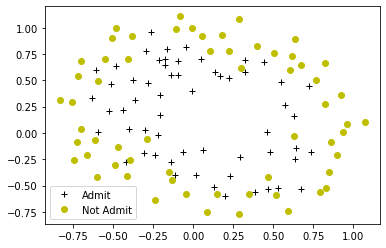

In [6]:
#Data Visualization

plt.plot(data[0][data[2] == 1], data[1][data[2] == 1], 'k+', label = 'Admit')
plt.plot(data[0][data[2] == 0], data[1][data[2] == 0], 'yo', label = 'Not Admit')
plt.legend()
plt.show()

In [7]:
#Polynomial Feature with 6 degree

log_reg = logistic_regression_reg()
X = data[[0, 1]]
y = data[2].values
X1 = log_reg.mapfeature(X, 6)

In [8]:
X1.shape

(118, 28)

In [9]:
initial_theta = np.zeros((X1.shape[1]))

In [10]:
grad = log_reg.gradient(initial_theta, X1, y, 1)

In [11]:
grad[0:5]

Ones    0.008475
x10     0.018788
x11     0.000078
x20     0.050345
x21     0.011501
dtype: float64

In [12]:
grad = log_reg.gradient(initial_theta, X1, y, 10)

In [14]:
grad[0:5]

Ones    0.008475
x10     0.018788
x11     0.000078
x20     0.050345
x21     0.011501
dtype: float64

In [15]:
#Minimum Cost Optimization using Scipy

minicost = log_reg.minimumcost(log_reg.costfunction, initial_theta, X1, y, 1)

In [16]:
minicost

array([ 1.27268722,  0.62557007,  1.18096633, -2.0191979 , -0.91761391,
       -1.4319418 ,  0.12375915, -0.3651304 , -0.35703343, -0.1748581 ,
       -1.45843768, -0.05129648, -0.61603938, -0.2746411 , -1.19282533,
       -0.24270351, -0.20570016, -0.04499755, -0.27782691, -0.29525823,
       -0.45613284, -1.04377849,  0.02762815, -0.29265599,  0.01543406,
       -0.32759334, -0.14389182, -0.92460113])

In [21]:
ypred = log_reg.predict(X1, minicost)

In [22]:
log_reg.score(y, ypred)

0.8305084745762712

In [23]:
#Verifying using Sklearn Model

from sklearn.linear_model import LogisticRegression

linrig = LogisticRegression(C = 1).fit(X1, y)
linrig.score(X1, y)

0.8305084745762712

In [24]:
#Visualization

def plotdata(lambda_coff):
    initita_theta = np.ones(X1.shape[1])
    minicost = log_reg.minimumcost(log_reg.costfunction, initial_theta, X1, y, lambda_coff)
    xs = np.linspace(-1, 1.5, 50)
    ys = np.linspace(-1, 1.5, 50)
    xx, yy = np.meshgrid(xs, ys)
    xsdata = pd.DataFrame({0:xx.ravel(), 1:yy.ravel()})
    Xdata = log_reg.mapfeature(xsdata, 6)
    initita_theta = np.zeros(X1.shape[1])
    htheta = log_reg.hypothesis(Xdata, minicost)
    htheta = htheta.reshape(50, 50)
    plt.plot(data[0][data[2] == 1], data[1][data[2] == 1], 'k+', label = 'Admit')
    plt.plot(data[0][data[2] == 0], data[1][data[2] == 0], 'yo', label = 'Not Admited')
    plt.contour(xx, yy, htheta, [0.5])
    plt.show()
    return minicost

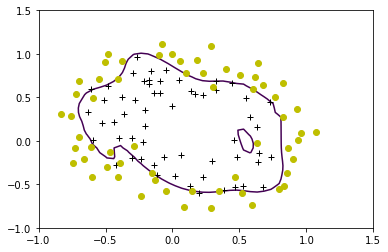

Accuracy 0.8813559322033898


In [26]:
#Overfitting (No regularization (Lambda = 0))

minicost = plotdata(0)
ypred = log_reg.predict(X1, minicost)
print('Accuracy', log_reg.score(y, ypred))

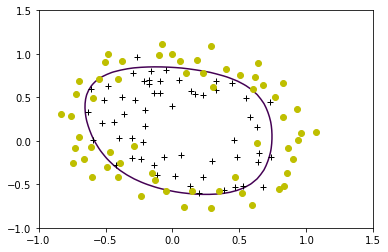

Accuracy 0.8305084745762712


In [27]:
#Regularization

minicost = plotdata(1)
ypred = log_reg.predict(X1, minicost)
print('Accuracy', log_reg.score(y, ypred))

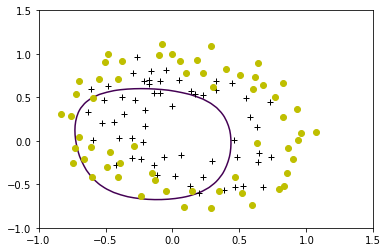

Accuracy 0.6101694915254238


In [28]:
#Underfitting ( lambda = 100)

minicost = plotdata(100)
ypred = log_reg.predict(X1, minicost)
print('Accuracy', log_reg.score(y, ypred))